# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

In [2]:
data = pd.read_csv(r"transfusion.csv", delimiter=",")
data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# **4. Exploratory Data Analysis (EDA)**


##### **1. Memahami Struktur Data**

In [3]:
data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


array([[<Axes: title={'center': 'Recency (months)'}>,
        <Axes: title={'center': 'Frequency (times)'}>],
       [<Axes: title={'center': 'Monetary (c.c. blood)'}>,
        <Axes: title={'center': 'Time (months)'}>],
       [<Axes: title={'center': 'whether he/she donated blood in March 2007'}>,
        <Axes: >]], dtype=object)

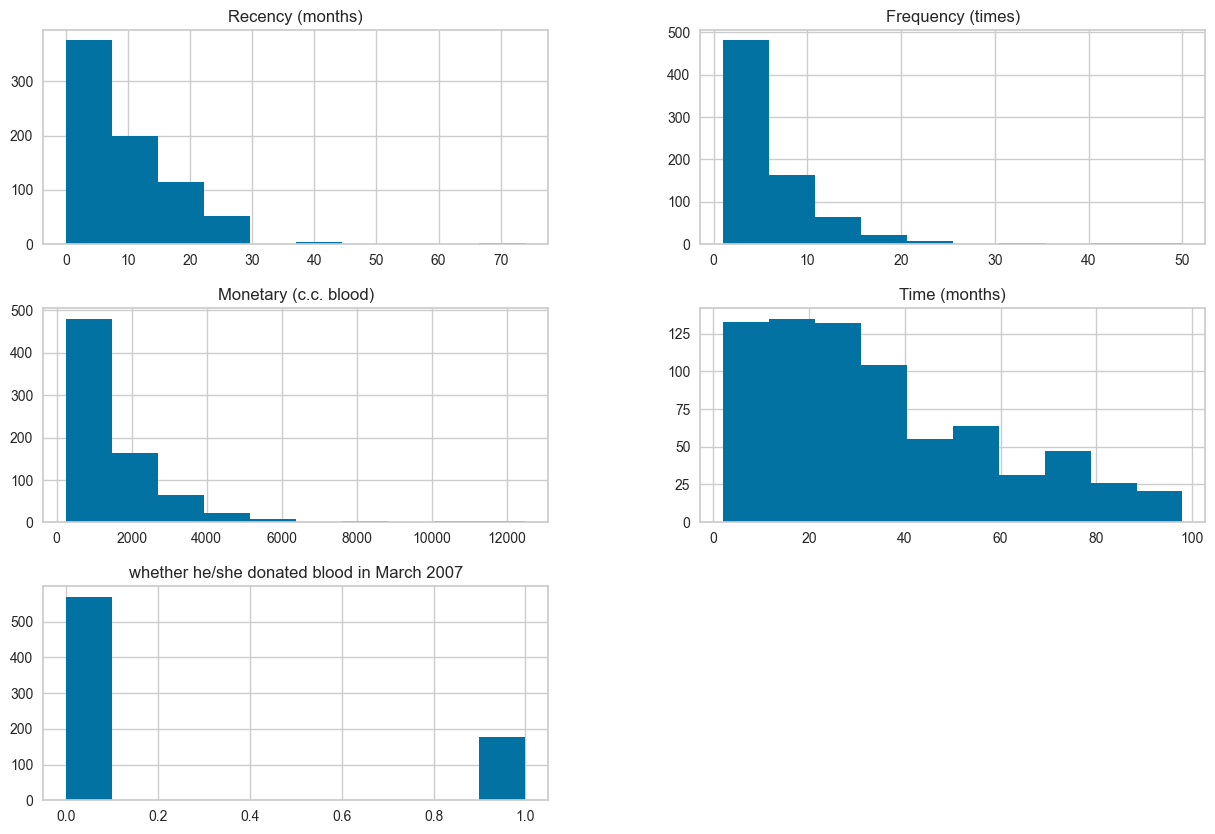

In [6]:
data.hist(figsize=(15, 10))

##### **2. Menangani Data Kosong**

In [7]:
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
 
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)
display(missing_percentage)
display(missing_data)
if(missing_data['Missing Values'].all() > 0):
    missing_data[missing_data['Missing Values'] > 0]
    print("There is missing values in the dataset")
else:
    print("No missing values in the dataset")

Recency (months)                              0.0
Frequency (times)                             0.0
Monetary (c.c. blood)                         0.0
Time (months)                                 0.0
whether he/she donated blood in March 2007    0.0
dtype: float64

,Missing Values,Percentage
Recency (months),0,0.0
Frequency (times),0,0.0
Monetary (c.c. blood),0,0.0
Time (months),0,0.0
whether he/she donated blood in March 2007,0,0.0


No missing values in the dataset


In [8]:
data = pd.DataFrame(data)
# data = data[['Customer Review', 'Emotion']]
data = data.rename(columns={"Recency (months)":"Months", "Frequency (times)":"Frequencies", "Monetary (c.c. blood)":"Monetary", 
                            "Time (months)":"NumMonth","whether he/she donated blood in March 2007":"isDonate"})
data

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [9]:
data_isdonate = data.groupby(by=["isDonate"]).agg({"isDonate":"count"}).rename(columns={"isDonate": "numDonate"})
display(data_isdonate)


,numDonate
isDonate,
0,570
1,178


##### **4. Visualisasi Data**

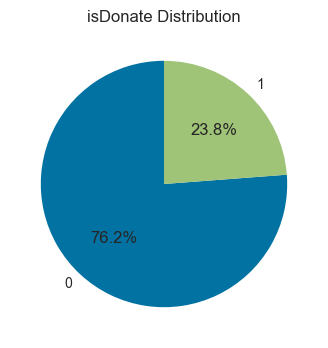

In [10]:
plt.figure(figsize=(4, 4))
plt.pie(data.isDonate.value_counts(), labels=['0','1'], autopct='%1.1f%%', startangle=90)
plt.title('isDonate Distribution')
plt.show()

In [ ]:
'''
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x=data_isdonate['isDonate'], 
    y=data_isdonate['numDonate'], 
    data=data_isdonate.sort_values(by="numDonate", ascending=False),
    hue=data_isdonate['Publisher_Name'], palette="Set2")
plt.title("Perusahaan Penerbit Video Game dengan Harga Tertinggi")
plt.xticks(horizontalalignment='center')
plt.xlabel("Publisher")
plt.ylabel("Harga Tertinggi")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()
'''

'\nplt.figure(figsize=(14, 7))\nax = sns.barplot(\n    x=data_isdonate[\'isDonate\'], \n    y=data_isdonate[\'numDonate\'], \n    data=data_isdonate.sort_values(by="numDonate", ascending=False),\n    hue=data_isdonate[\'Publisher_Name\'], palette="Set2")\nplt.title("Perusahaan Penerbit Video Game dengan Harga Tertinggi")\nplt.xticks(horizontalalignment=\'center\')\nplt.xlabel("Publisher")\nplt.ylabel("Harga Tertinggi")\nfor i in ax.containers:\n    ax.bar_label(i,)\nplt.show()\n\nplt.figure(figsize=(6, 4))\nax = sns.barplot(\n    x="LoginAttempts", \n    y="banyaknya_login", \n    data=number_login.sort_values(by="banyaknya_login", ascending=True))\nplt.title("Login Attempt Distribution")\nplt.xlabel("Login Attempts")\nplt.ylabel("Number of Login Attempts")\nfor i in ax.containers:\n    ax.bar_label(i,)\nplt.show()\n'

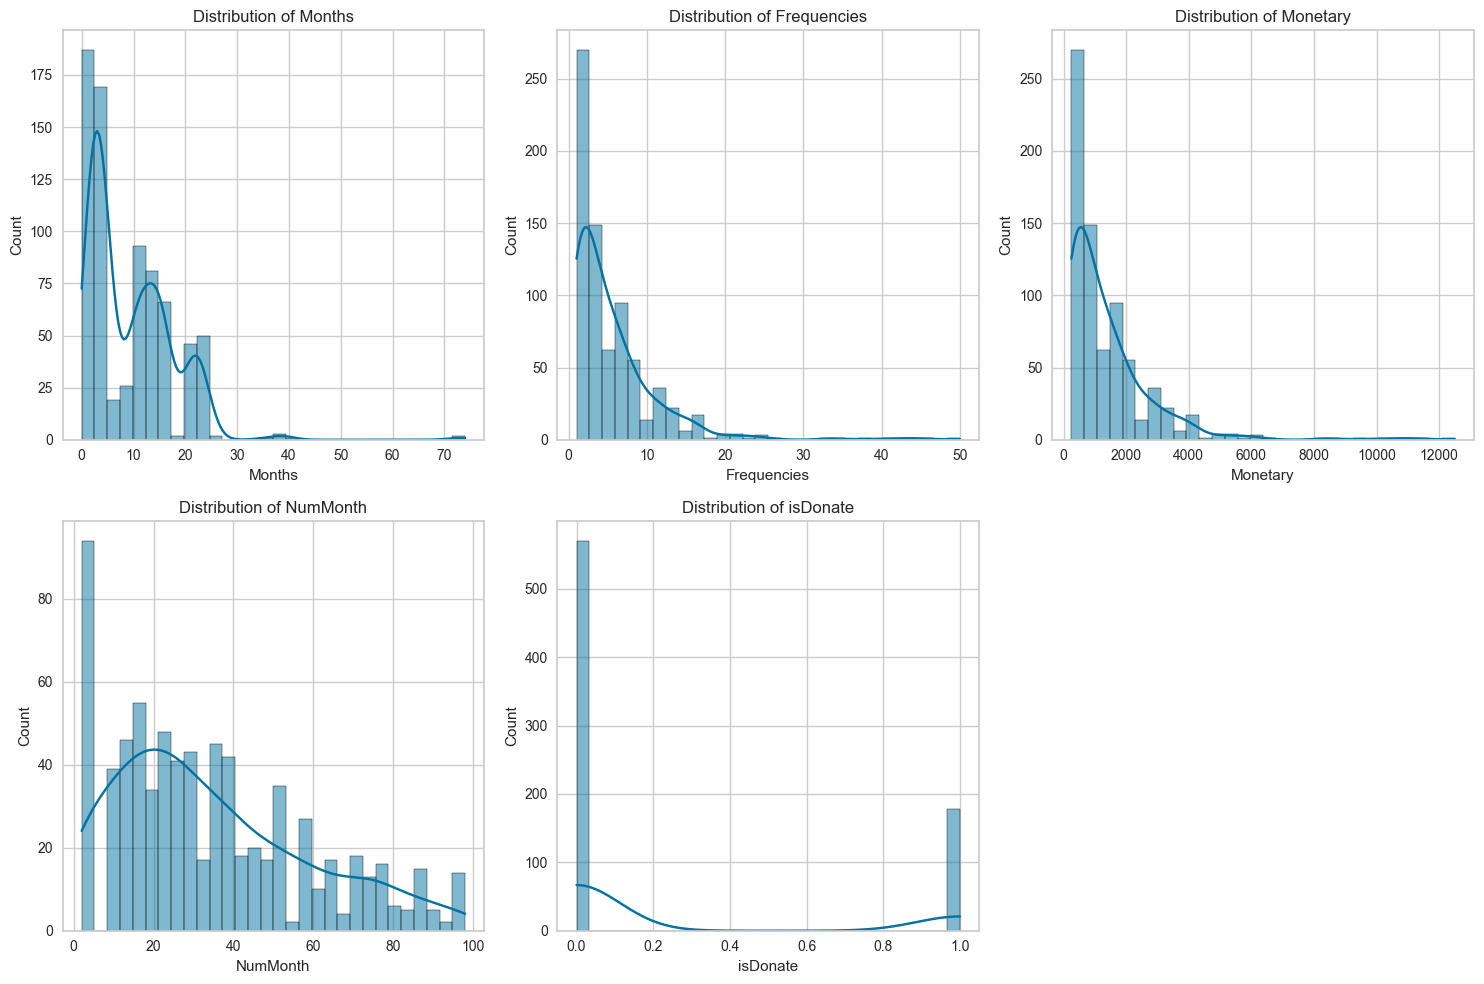

In [ ]:

plt.figure(figsize=(15, 10))
for i, column in enumerate(data, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [12]:
data_corr = data.corr()
data_corr

,Months,Frequencies,Monetary,NumMonth,isDonate
Months,1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequencies,-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary,-0.182745,1.000000,1.000000,0.634940,0.218633
NumMonth,0.160618,0.634940,0.634940,1.000000,-0.035854
isDonate,-0.279869,0.218633,0.218633,-0.035854,1.000000


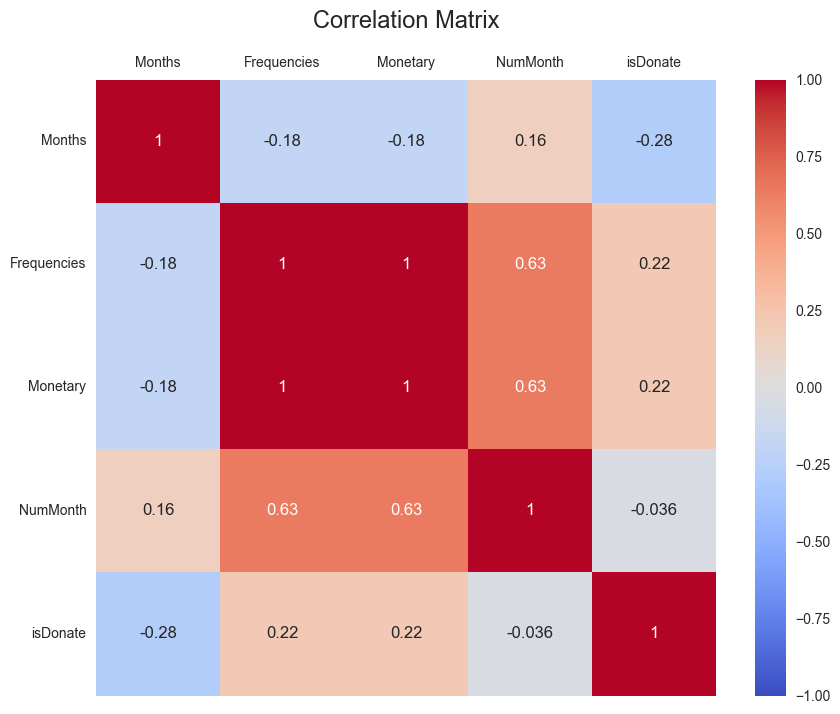

In [13]:
plt.figure(figsize=(10, 8))
cm = data_corr
 
sns.heatmap(cm, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=17, pad=20)
plt.yticks(rotation=0, horizontalalignment='right')
plt.gca().xaxis.tick_top()
plt.show()

# **5. Data Preprocessing**

##### 3. Mendeteksi dan menghapus data duplikasi

In [1]:
duplicates = data.duplicated()

NameError: name 'data' is not defined

##### 4. Deteksi dan Penanganan Outlier 
Namun, ini tidak dipakai untuk tahap analisis pada datasetnya karena data yang kedetect outlier bisa jadi informasi penting, maka kita tidak akan menangani data outlier secara matematis dan mengunjungi ke tahap lebih lanjut untuk sementara.

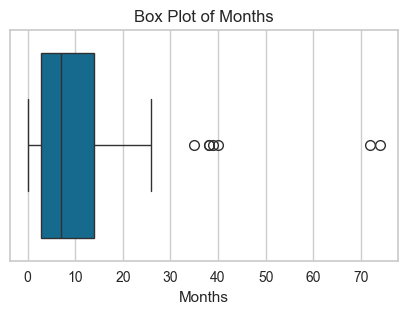

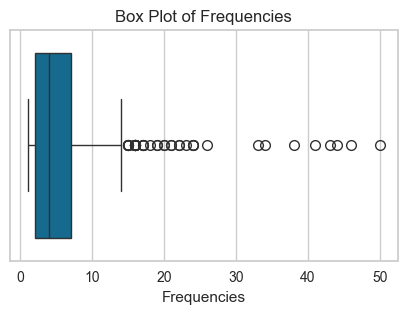

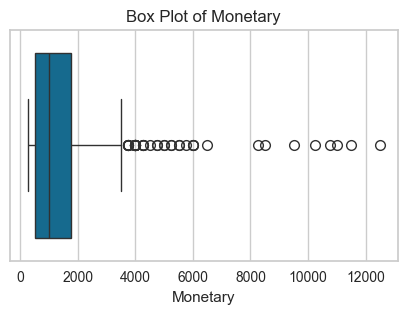

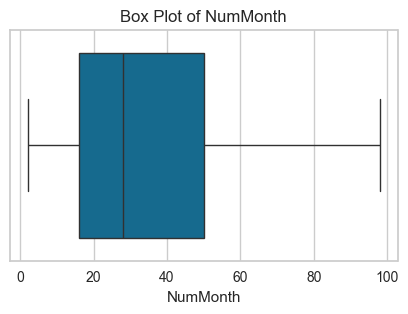

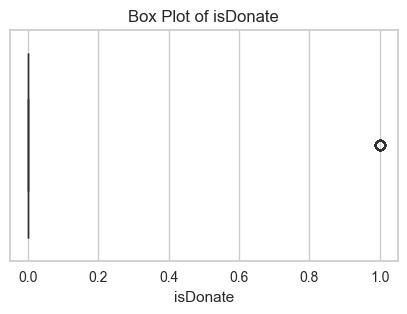

In [15]:
# Mendeteksi Outlier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in data:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
# Menghapus outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
batas_bawah, batas_atas = (Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)

condition = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
df_iqr = data.loc[condition, data.columns]


In [20]:
# Menangani Outlier

def median_outlier(data, batas_bawah, batas_atas):
    median = data.median()
    data = data.apply(lambda x: median if (x < batas_bawah) | (x > batas_atas) else x)
    return data

def near_outlier(data, batas_bawah, batas_atas):
    data = data.apply(lambda x: (Q1 - 1.5 * IQR) if x < batas_bawah else batas_atas if x > batas_bawah else x)
    return data

def delete_outlier(data, batas_bawah, batas_atas):
    condition = ~((data < (batas_bawah)) | (data > (batas_atas))).any(axis=1)
    return condition

def handleOutlier(data, feature):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah, batas_atas = (Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)
    
    display(data, feature)
    # replace outlier wiith median
    data = median_outlier(data, batas_bawah, batas_atas)

    # replace outlier with near bound
    # data = near_outlier(data, batas_bawah, batas_atas)
    return data

dataCopy = data.copy()
for feature in dataCopy.columns:
    dataCopy[feature] = handleOutlier(dataCopy[feature], feature)

0       2
1       0
2       1
3       2
4       1
       ..
743    23
744    21
745    23
746    39
747    72
Name: Months, Length: 748, dtype: int64

'Months'

0      50
1      13
2      16
3      20
4      24
       ..
743     2
744     2
745     3
746     1
747     1
Name: Frequencies, Length: 748, dtype: int64

'Frequencies'

0      12500
1       3250
2       4000
3       5000
4       6000
       ...  
743      500
744      500
745      750
746      250
747      250
Name: Monetary, Length: 748, dtype: int64

'Monetary'

0      98
1      28
2      35
3      45
4      77
       ..
743    38
744    52
745    62
746    39
747    72
Name: NumMonth, Length: 748, dtype: int64

'NumMonth'

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: isDonate, Length: 748, dtype: int64

'isDonate'

In [21]:
# menampung penggabungan antara hasil data penanganan outlier dgn data kategorikal
# ke data baru supaya lebih refresh
# data_test = pd.concat([dataCopy, data_kategorikal], axis=1)
display(dataCopy)

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2.0,4.0,1000.0,98,0.0
1,0.0,13.0,3250.0,28,0.0
2,1.0,4.0,1000.0,35,0.0
3,2.0,4.0,1000.0,45,0.0
4,1.0,4.0,1000.0,77,0.0
...,...,...,...,...,...
743,23.0,2.0,500.0,38,0.0
744,21.0,2.0,500.0,52,0.0
745,23.0,3.0,750.0,62,0.0
746,7.0,1.0,250.0,39,0.0


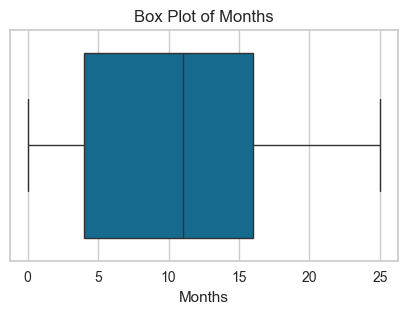

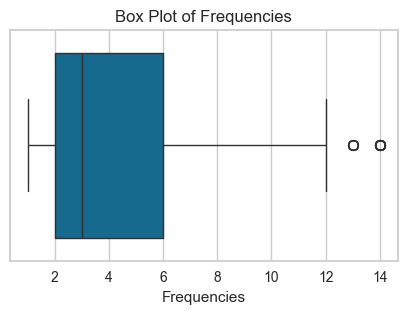

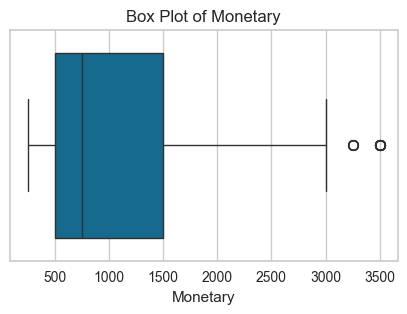

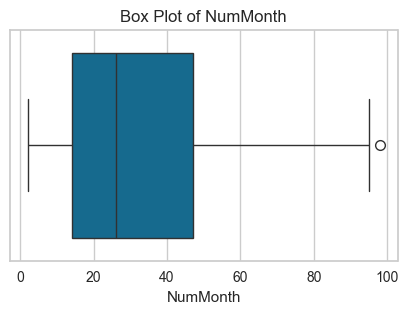

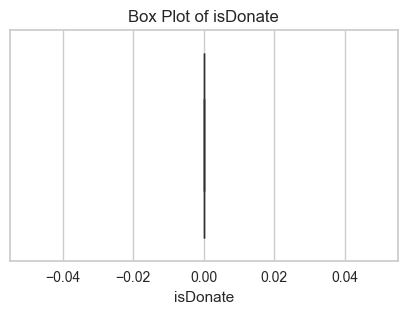

In [25]:
for feature in df_iqr:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df_iqr[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

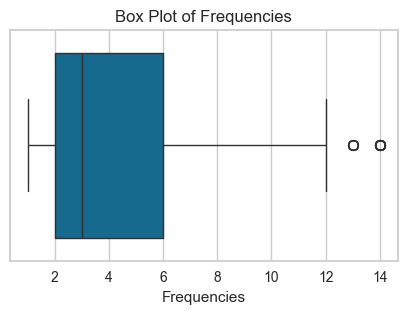

In [33]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_iqr["Frequencies"])
plt.title(f'Box Plot of Frequencies')
plt.show()

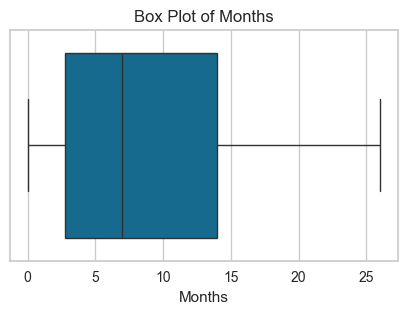

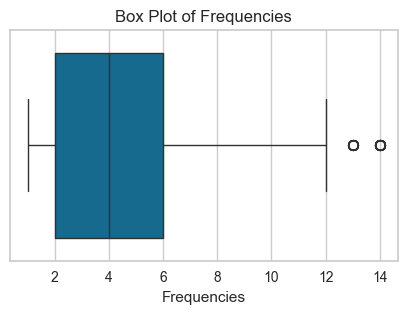

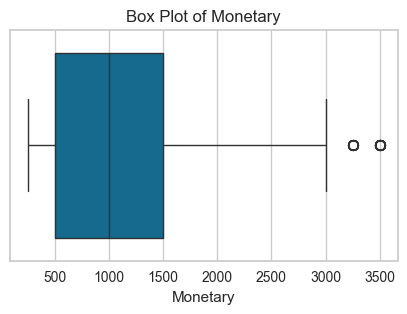

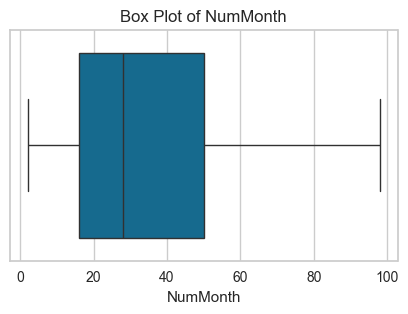

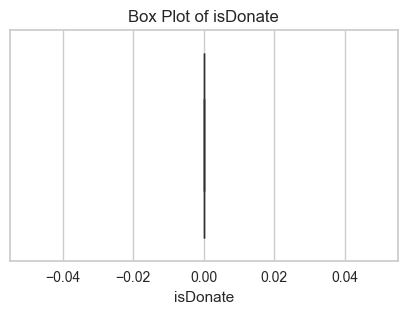

In [34]:
for feature in dataCopy:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=dataCopy[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [35]:
b = ["Frequencies", "Monetary"]
for feature in b:
    dataCopy[feature] = handleOutlier(dataCopy[feature], feature)
    
display(dataCopy)

0       4.0
1      13.0
2       4.0
3       4.0
4       4.0
       ... 
743     2.0
744     2.0
745     3.0
746     1.0
747     1.0
Name: Frequencies, Length: 748, dtype: float64

'Frequencies'

0      1000.0
1      3250.0
2      1000.0
3      1000.0
4      1000.0
        ...  
743     500.0
744     500.0
745     750.0
746     250.0
747     250.0
Name: Monetary, Length: 748, dtype: float64

'Monetary'

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2.0,4.0,1000.0,98,0.0
1,0.0,4.0,1000.0,28,0.0
2,1.0,4.0,1000.0,35,0.0
3,2.0,4.0,1000.0,45,0.0
4,1.0,4.0,1000.0,77,0.0
...,...,...,...,...,...
743,23.0,2.0,500.0,38,0.0
744,21.0,2.0,500.0,52,0.0
745,23.0,3.0,750.0,62,0.0
746,7.0,1.0,250.0,39,0.0


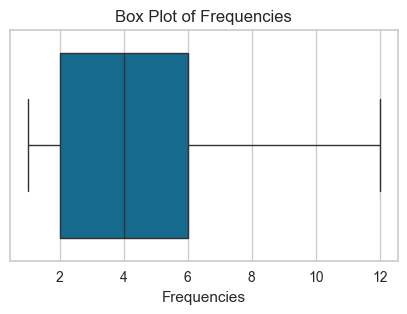

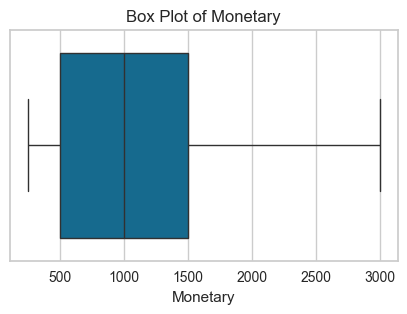

In [36]:
for feature in b:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=dataCopy[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

##### 5. Feature Selecting
Memilih kolom untuk melatih model

In [16]:
features = ["Months", "Frequencies", "Monetary"]
features_2 = ["Months", "Frequencies", "Monetary", "NumMonth"]

display(data[features])
# display(data[features_2])
display(data.info())

,Months,Frequencies,Monetary
0,2,50,12500
1,0,13,3250
2,1,16,4000
3,2,20,5000
4,1,24,6000
...,...,...,...
743,23,2,500
744,21,2,500
745,23,3,750
746,39,1,250


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Months       748 non-null    int64
 1   Frequencies  748 non-null    int64
 2   Monetary     748 non-null    int64
 3   NumMonth     748 non-null    int64
 4   isDonate     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


None

##### 5. Normalisasi atau Standarisasi Fitur

In [17]:
# normalization = MinMaxScaler()
scaler = StandardScaler()
# data_normal = normalize(data_baru[fitur_numerikal])
# data_normalize = normalization.fit_transform(data_baru[fitur_numerikal])
data_scaler = scaler.fit_transform(data[features])
# data_scaler2 = scaler.fit_transform(data[features_2])
display(data_scaler)
# display(data_scaler2)

array([[-0.92789873,  7.62334626,  7.62334626],
       [-1.17511806,  1.28273826,  1.28273826],
       [-1.0515084 ,  1.79684161,  1.79684161],
       ...,
       [ 1.66790417, -0.43093957, -0.43093957],
       [ 3.64565877, -0.77367514, -0.77367514],
       [ 7.72477762, -0.77367514, -0.77367514]])

Text(0.5, 1.0, 'Histogram Sebelum Di-transform oleh standarisasi')

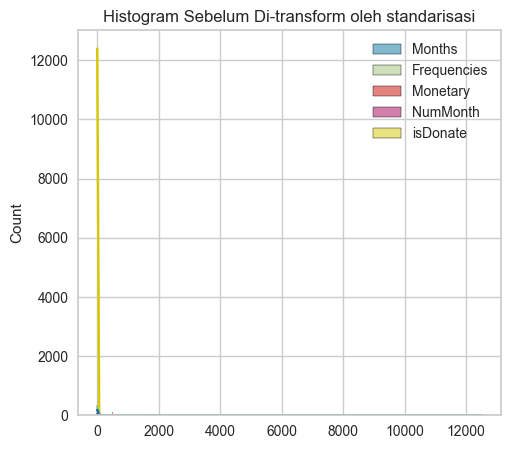

In [18]:
# Histogram Sebelum Normalisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title("Histogram Sebelum Di-transform oleh standarisasi")

Text(0.5, 1.0, 'Histogram Setelah Di-transform oleh Standarisasi')

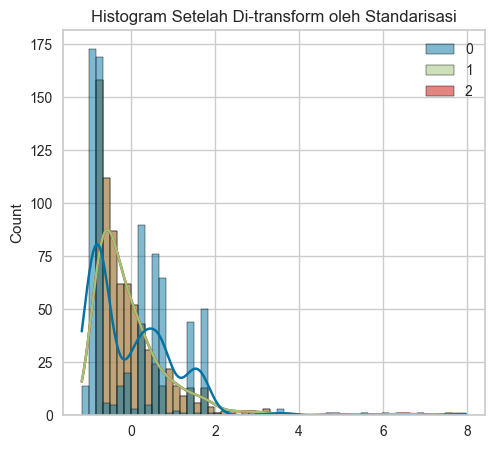

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(data_scaler, kde=True)
plt.title("Histogram Setelah Di-transform oleh Standarisasi")

In [20]:
data_numMonths = data.copy()
data_without_numMonths = data.copy()

In [21]:
display(data)
display(data_numMonths)
display(data_without_numMonths)

,Months,Frequencies,Monetary,NumMonth,isDonate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


,Months,Frequencies,Monetary,NumMonth,isDonate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


,Months,Frequencies,Monetary,NumMonth,isDonate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [22]:
features

['Months', 'Frequencies', 'Monetary']

In [23]:
data_without_numMonths[features] = data_scaler
data_without_numMonths

,Months,Frequencies,Monetary,NumMonth,isDonate
0,-0.927899,7.623346,7.623346,98,1
1,-1.175118,1.282738,1.282738,28,1
2,-1.051508,1.796842,1.796842,35,1
3,-0.927899,2.482313,2.482313,45,1
4,-1.051508,3.167784,3.167784,77,0
...,...,...,...,...,...
743,1.667904,-0.602307,-0.602307,38,0
744,1.420685,-0.602307,-0.602307,52,0
745,1.667904,-0.430940,-0.430940,62,0
746,3.645659,-0.773675,-0.773675,39,0


In [24]:
# data_numMonths[features_2] = data_scaler2
# data_numMonths

In [29]:
display(features_2)
display(features)

['Months', 'Frequencies', 'Monetary', 'NumMonth']

['Months', 'Frequencies', 'Monetary']

In [30]:
X = data_without_numMonths[features].values
print(X)

[[-0.92789873  7.62334626  7.62334626]
 [-1.17511806  1.28273826  1.28273826]
 [-1.0515084   1.79684161  1.79684161]
 ...
 [ 1.66790417 -0.43093957 -0.43093957]
 [ 3.64565877 -0.77367514 -0.77367514]
 [ 7.72477762 -0.77367514 -0.77367514]]


In [31]:
# X_2 = data_numMonths[features_2].values
# print(X_2)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

##### 1. Elbow Method untuk menentukan jumlah cluster

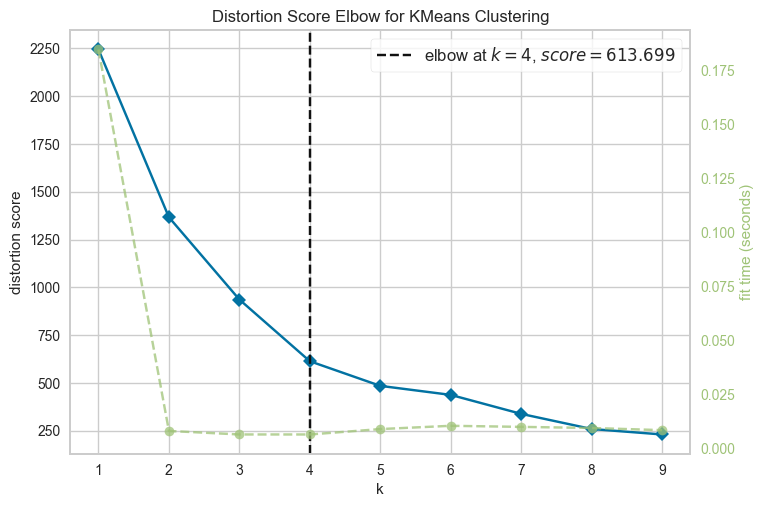

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [33]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
# dapat jumlah cluster dari hasil elbow method yang ada di paling bawah
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [34]:
# kmeans = KMeans(n_clusters=3, random_state=42)
print(f"Silhouette Score: {silhouette_score(X, kmeans.fit_predict(X)):1f}")

Silhouette Score: 0.451208


## **c. Feature Selection (Opsional)**
### Buat perbandingan hasil

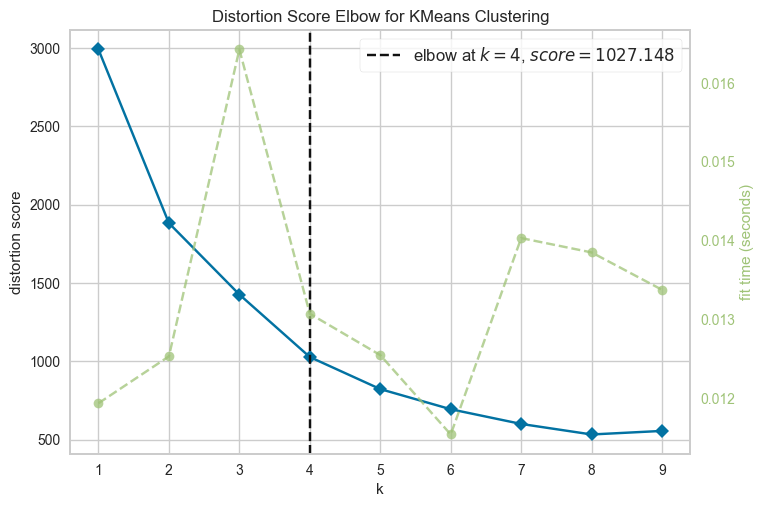

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_2)
visualizer.show()

In [116]:
kmeans = KMeans(n_clusters=4, random_state=42)
display(kmeans.fit(X_2))
print(f"Silhouette Score: {silhouette_score(X_2, kmeans.fit_predict(X_2)):1f}")

KMeans(n_clusters=4, random_state=42)

Silhouette Score: 0.369873


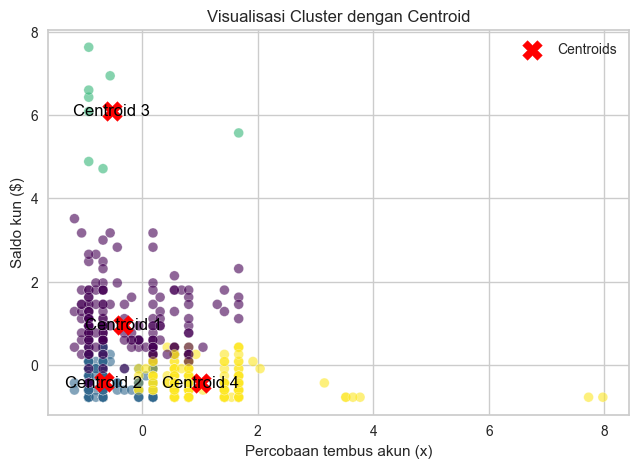

Nilai Centroids:
Centroid 1: Percobaan tembus akun = -0.33, Saldo akun = 0.96
Centroid 2: Percobaan tembus akun = -0.67, Saldo akun = -0.42
Centroid 3: Percobaan tembus akun = -0.53, Saldo akun = 6.10
Centroid 4: Percobaan tembus akun = 1.01, Saldo akun = -0.42


In [117]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_ 

plt.figure(figsize=(7.5, 5))

plt.scatter(X_2[:, 0], X_2[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=200, marker='X', label='Centroids')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='black', fontsize=12, ha='center', va='center')
 
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Percobaan tembus akun (x)')
plt.ylabel('Saldo kun ($)')
plt.legend()
plt.show()

print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Percobaan tembus akun = {centroid[0]:.2f}, Saldo akun = {centroid[1]:.2f}")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

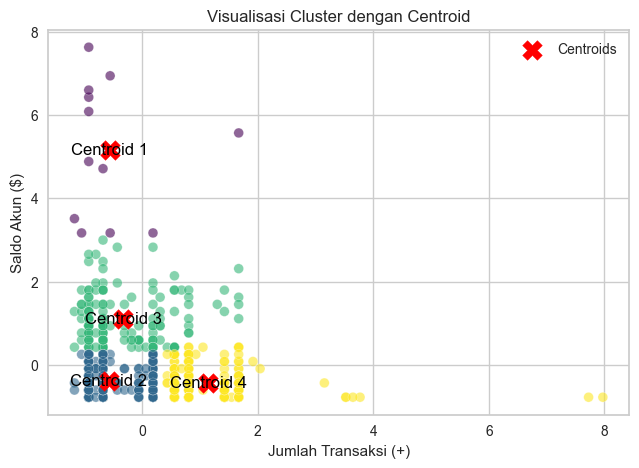

Nilai Centroids:
Centroid 1: Jumlah Transaksi = -0.57, Saldo Akun = 5.15
Centroid 2: Jumlah Transaksi = -0.58, Saldo Akun = -0.38
Centroid 3: Jumlah Transaksi = -0.33, Saldo Akun = 1.10
Centroid 4: Jumlah Transaksi = 1.14, Saldo Akun = -0.43


In [35]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_ 

plt.figure(figsize=(7.5, 5))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=200, marker='X', label='Centroids')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='black', fontsize=12, ha='center', va='center')
 
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Jumlah Transaksi (+)')
plt.ylabel('Saldo Akun ($)')
plt.legend()
plt.show()

print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Jumlah Transaksi = {centroid[0]:.2f}, Saldo Akun = {centroid[1]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [36]:
data_without_numMonths['Cluster'] = kmeans.labels_
data_without_numMonths['Cluster']

0      0
1      2
2      2
3      2
4      0
      ..
743    3
744    3
745    3
746    3
747    3
Name: Cluster, Length: 748, dtype: int32

In [37]:
data_without_numMonths

,Months,Frequencies,Monetary,NumMonth,isDonate,Cluster
0,-0.927899,7.623346,7.623346,98,1,0
1,-1.175118,1.282738,1.282738,28,1,2
2,-1.051508,1.796842,1.796842,35,1,2
3,-0.927899,2.482313,2.482313,45,1,2
4,-1.051508,3.167784,3.167784,77,0,0
...,...,...,...,...,...,...
743,1.667904,-0.602307,-0.602307,38,0,3
744,1.420685,-0.602307,-0.602307,52,0,3
745,1.667904,-0.430940,-0.430940,62,0,3
746,3.645659,-0.773675,-0.773675,39,0,3


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [38]:
data_without_numMonths[features]

,Months,Frequencies,Monetary
0,-0.927899,7.623346,7.623346
1,-1.175118,1.282738,1.282738
2,-1.051508,1.796842,1.796842
3,-0.927899,2.482313,2.482313
4,-1.051508,3.167784,3.167784
...,...,...,...
743,1.667904,-0.602307,-0.602307
744,1.420685,-0.602307,-0.602307
745,1.667904,-0.430940,-0.430940
746,3.645659,-0.773675,-0.773675


In [39]:
scaler

StandardScaler()

In [40]:
lmao = data_without_numMonths.copy()

In [41]:
data_without_numMonths[features]=scaler.inverse_transform(data_without_numMonths[features])
data_without_numMonths

,Months,Frequencies,Monetary,NumMonth,isDonate,Cluster
0,2.0,50.0,12500.0,98,1,0
1,0.0,13.0,3250.0,28,1,2
2,1.0,16.0,4000.0,35,1,2
3,2.0,20.0,5000.0,45,1,2
4,1.0,24.0,6000.0,77,0,0
...,...,...,...,...,...,...
743,23.0,2.0,500.0,38,0,3
744,21.0,2.0,500.0,52,0,3
745,23.0,3.0,750.0,62,0,3
746,39.0,1.0,250.0,39,0,3


In [42]:
# Sebelum mengubah nomor indeks
print(data_without_numMonths.groupby(by=['Cluster']).agg({'Months':'mean', 'Frequencies':'mean', 'Monetary':'mean'}), "\n")

# Setelah mengubah nomor indeks
mean_data = data_without_numMonths.groupby(by=['Cluster']).agg({'Months':'mean', 'Frequencies':'mean', 'Monetary':'mean'})
set_data = mean_data.reset_index(drop=True)
set_data.index += 1
set_data.index.name = "Cluster"
print(set_data)

            Months  Frequencies     Monetary
Cluster                                     
0         4.916667    35.583333  8895.833333
1         4.827195     3.322946   830.736544
2         6.844156    11.922078  2980.519481
3        18.751092     3.008734   752.183406 

            Months  Frequencies     Monetary
Cluster                                     
1         4.916667    35.583333  8895.833333
2         4.827195     3.322946   830.736544
3         6.844156    11.922078  2980.519481
4        18.751092     3.008734   752.183406


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [44]:
data_without_numMonths.to_csv("data-with-outlier/data_kmeans.csv", index=False)